In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def x(n):
    return np.arange(0,n,1,dtype=int)
def f(x,k):
    return np.exp(-k*x)

In [28]:
n=26
k=.3

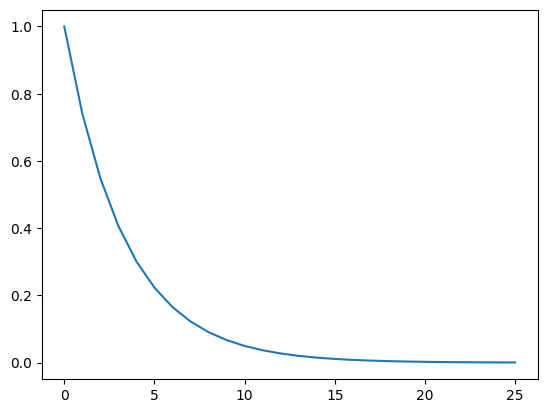

In [29]:
plt.plot(x(n), f(x(n),k))

In [30]:
n_payouts = [2,5,8,10,15,25]
payouts = {}
for p in n_payouts:
    p_sum = -1
    payouts[p] = []
    for i in range (p+1):
        payouts[p].append(f(i,k))
        p_sum += f(i,k)
    payouts[p].pop(0)
    payouts[p] = payouts[p]/p_sum

In [31]:
for n in n_payouts:
    for p in range(len(payouts[n])):
        print(f"#{p+1}", payouts[n][p],)
    print("\n")

#1 0.574442516811659
#2 0.42555748318834097


#1 0.33362317086193194
#2 0.24715412381612914
#3 0.18309627823961383
#4 0.13564105905891546
#5 0.10048536802340953


#1 0.28504002719056903
#2 0.2111628457663858
#3 0.156433283674742
#4 0.11588862686732078
#5 0.08585240635309609
#6 0.06360102691574447
#7 0.04711679959325185
#8 0.03490498363888993


#1 0.27276178916350646
#2 0.20206690331807073
#3 0.1496948437747579
#4 0.11089666781044388
#5 0.08215427212686456
#6 0.06086138169842546
#7 0.04508722049805841
#8 0.03340143446485591
#9 0.02474439124847157
#10 0.018331095896544976


#1 0.262093373699405
#2 0.19416354675646175
#3 0.14383989322937354
#4 0.1065592137652328
#5 0.07894100713880256
#6 0.05848093644739051
#7 0.043323743282756455
#8 0.03209501841200317
#9 0.023776574432727165
#10 0.017614119565159358
#11 0.013048860715136393
#12 0.009666833776910912
#13 0.007161366598237071
#14 0.005305270860955472
#15 0.003930241319447599


#1 0.25932520803763304
#2 0.19211283919635558
#3 0.142320691703

In [71]:
def payout_distribution(total_payout, n_total_places, fixed_places=None, k=1.0):
    if fixed_places is None: 
        fixed_places = {}
    remaining_places = n_total_places - len(fixed_places)
    exp_values = np.exp(-k * np.linspace(0, 3, remaining_places))
    exp_values *= (1 - sum(fixed_places.values())) / sum(exp_values) if remaining_places > 0 else 1
    values = []
    exp_index = 0
    for i in range(1, n_total_places + 1):
        if i in fixed_places:
            values.append(fixed_places[i])
        else:
            values.append(exp_values[exp_index])
            exp_index += 1
    return [v * total_payout for v in values]

In [84]:
total_payout = 1.0
n_total_places = 25
fixed_places = { 16: 0.01, 17: 0.01, 18: 0.01, 19: 0.01, 20: 0.005, 21: 0.005, 22: 0.005, 23: 0.005, 24: 0.005, 25: 0.005}
k = .9

In [85]:
payout_list = payout_distribution(total_payout, n_total_places, fixed_places, k)
for p in range(len(payout_list)):
    print(f"#{p+1} {payout_list[p]:.3f}")


#1 0.173
#2 0.142
#3 0.117
#4 0.097
#5 0.080
#6 0.066
#7 0.054
#8 0.045
#9 0.037
#10 0.030
#11 0.025
#12 0.021
#13 0.017
#14 0.014
#15 0.012
#16 0.010
#17 0.010
#18 0.010
#19 0.010
#20 0.005
#21 0.005
#22 0.005
#23 0.005
#24 0.005
#25 0.005
